<a href="https://colab.research.google.com/github/HechengJin0/MGCX/blob/master/monkey_mgc_calculate_quick_v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# start

In [ ]:
!pip install mgcpy
!pip install graspy
!pip install nibabel==3.0.1
!pip install cifti
!pip install nilearn

     |████████████████████████████████| 184kB 3.4MB/s 
     |████████████████████████████████| 2.1MB 10.5MB/s 
  Created wheel for mgcpy: filename=mgcpy-0.4.0-cp36-cp36m-linux_x86_64.whl size=375488 sha256=f9e5b41bdf5a24a46ee4e12fe984414c35b65e771904d6d7ffa5c093d9d5b5a1
  Stored in directory: /root/.cache/pip/wheels/05/24/74/10695faeaa45e4c7f4c60ee78c36a661dc2aa2cbd5f9f13539
Successfully built mgcpy
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
     |████████████████████████████████| 92kB 2.9MB/s 
  Created wheel for graspy: filename=graspy-0.3.0-cp36-none-any.whl size=115244 sha256=ae12731e5a8a0f165bc6d6b1172def128e148fd81a8ded0a26628e2471c0990c
  Stored in directory: /root/.cache/pip/wheels/ad/61/8a/3d44e5964d436c7fe7d83b354b9891c87f64c9c5acc4bba03a
  Created wheel for hyppo: filename=hyppo-0.1.3-cp36-none-any.whl size=64216 sha256=ee524a2e8419e397eee929e0d7f407d04e959ee741f99111b010dd36412c8867
  Stored i

In [ ]:
from google.colab import drive
drive.mount('/gdrive')


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:

# MARCC Job https://github.com/rmehta004/connectomics-with-mgcx/blob/master/code/run-mgcx-hcp.py
import numpy as np
from joblib import Parallel, delayed
import sys
import nibabel as nib
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
from statistics import mean
from mgcpy.independence_tests.mgcx import MGCX
from mgcpy.independence_tests.mgc import MGC
from mgcpy.independence_tests.dcorr import DCorr

import scipy
from scipy.stats import pearsonr, zscore

import graspy as gp
from graspy.plot import heatmap
import pandas as pd
from scipy.stats import pearsonr, zscore, spearmanr
from statistics import mean 

import graspy as gp
from graspy.plot import heatmap
import cifti

# check parcel and data


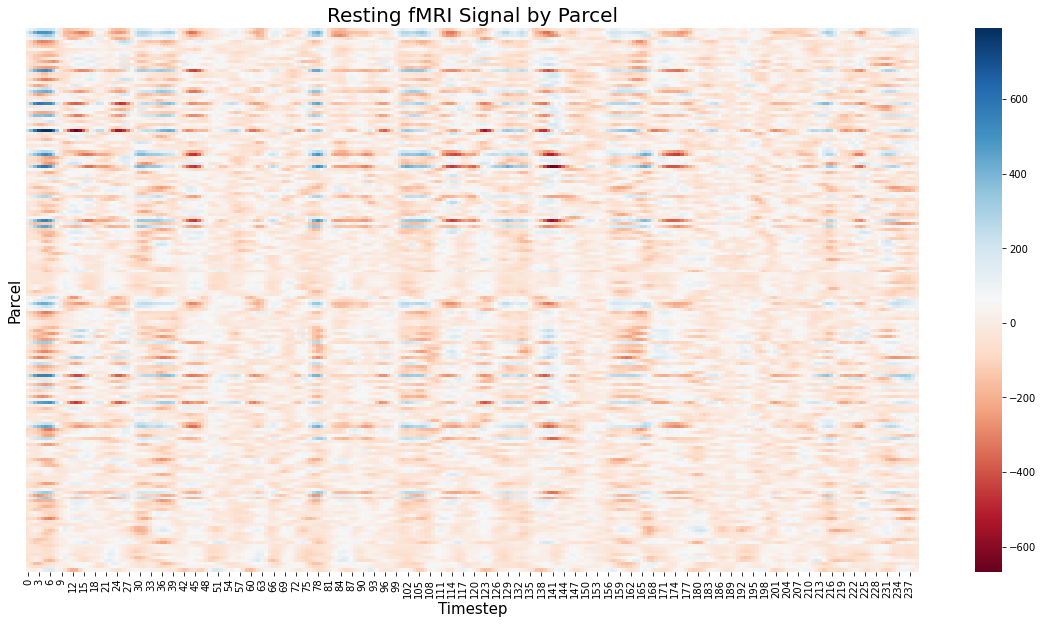

(182, 240)
(240, 182)


In [ ]:
# img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/10k_Markov182/ses-combined_task-MB1acq20170706_run-13_DCANBOLDProc_v4.0.0_Atlas.10k.MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries.nii")
# img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/10k_noGSR_smoothed3mm_Markov/ses-combined_task-MB1acq20170706_run-13_DCANBOLDProc_v4.0.0_Atlas.10k.MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries.nii")
img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/10k_GSR_smoothed3mm_Markov/ses-combined_task-RESTacq20200707_run-1_DCANBOLDProc_v4.0.0_Atlas.10k.MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries.nii")

data = np.array(img.get_fdata())
timesteps = 30
# displayed_data = np.transpose(data[range(timesteps),:])
displayed_data = np.transpose(data)
plt.subplots(figsize=(20,10))
ax = sns.heatmap(displayed_data, yticklabels=False, cmap = 'RdBu')

plt.title('Resting fMRI Signal by Parcel', fontsize = 20)
plt.ylabel('Parcel', fontsize = 15)
plt.xlabel('Timestep', fontsize = 15)
plt.show()
print(displayed_data.shape)
print(data.shape)

In [ ]:
import nibabel.cifti2.cifti2 as ci
from nibabel import cifti2
import nibabel as nib
import cifti 
import numpy as np

cif_LR = cifti.read("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/10k_GSR_smoothed3mm_Markov/ses-combined_task-RESTacq20200707_run-1_DCANBOLDProc_v4.0.0_Atlas.10k.MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries.nii")
# cif_LR = cifti.read('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/10k_Markov182/ses-combined_task-MB1acq20170706_run-13_DCANBOLDProc_v4.0.0_Atlas.10k.MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries.nii')
# cif_RL = cifti.read('/gdrive/My Drive/CMI/Project/MGCX/data/HCP_trt_07012020/HCP_trt/test/917255/rfMRI_REST1_RL/nogsr/rfMRI_REST1_RL_Atlas_MSMAll_hp2000_clean_24nuisance.reg_lin.trend_filt_sm6.ptseries.nii')

parcel_LR = []
parcel_RL = []
fs5label = nib.load('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/MarkovCC12_M132_182-area.10k_fs_LR.dlabel.nii')

for i in range(182):
  parcel_LR.append(cif_LR[1][1][i][0])

# for i in range(360):
#   parcel_RL.append(cif_RL[1][1][i][0])
print(parcel_LR)
# print(parcel_RL)

glasserlabel,(ax1,ax2) = cifti.read(fs5label)
ax1[0]

['R_1', 'R_2', 'R_3', 'R_5', 'R_9', 'R_10', 'R_11', 'R_12', 'R_13', 'R_14', 'R_23', 'R_25', 'R_31', 'R_32', 'R_44', 'R_24a', 'R_24b', 'R_24c', 'R_24d', 'R_29/30', 'R_45A', 'R_45B', 'R_46d', 'R_46v', 'R_7A', 'R_7B', 'R_7m', 'R_7op', 'R_8B', 'R_8l', 'R_8m', 'R_8r', 'R_9/46d', 'R_9/46v', 'R_AIP', 'R_CORE', 'R_DP', 'R_ENTORHINAL', 'R_F1', 'R_F2', 'R_F3', 'R_F4', 'R_F5', 'R_F6', 'R_F7', 'R_FST', 'R_Gu', 'R_INSULA', 'R_IPa', 'R_LB', 'R_LIP', 'R_MB', 'R_MIP', 'R_MST', 'R_MT', 'R_OPAI', 'R_OPRO', 'R_Parainsula', 'R_PBc', 'R_PBr', 'R_PERIRHINAL', 'R_PGa', 'R_PIP', 'R_PIRIFORM', 'R_ProM', 'R_Pro.St', 'R_SII', 'R_STPc', 'R_STPi', 'R_STPr', 'R_SUBICULUM', 'R_TEad', 'R_TEa/ma', 'R_TEa/mp', 'R_TEav', 'R_TEMPORAL_POLE', 'R_TEO', 'R_TEOm', 'R_TEpd', 'R_TEpv', 'R_TH/TF', 'R_TPt', 'R_V1', 'R_V2', 'R_V3', 'R_V3A', 'R_V4', 'R_V4t', 'R_V6', 'R_V6A', 'R_VIP', 'L_1', 'L_2', 'L_3', 'L_5', 'L_9', 'L_10', 'L_11', 'L_12', 'L_13', 'L_14', 'L_23', 'L_25', 'L_31', 'L_32', 'L_44', 'L_24a', 'L_24b', 'L_24c', 'L_24d',

('#1',
 {0: ('???', (1.0, 1.0, 1.0, 0.0)),
  1: ('R_1', (1.0, 0.466667, 0.478431, 1.0)),
  2: ('R_2', (0.627451, 0.0, 0.266667, 1.0)),
  3: ('R_3', (0.266667, 0.768627, 0.772549, 1.0)),
  4: ('R_5', (0.207843, 0.301961, 0.509804, 1.0)),
  5: ('R_9', (1.0, 0.721569, 0.0, 1.0)),
  6: ('R_10', (1.0, 0.0, 0.0, 1.0)),
  7: ('R_11', (0.0, 0.631373, 0.0, 1.0)),
  8: ('R_12', (0.490196, 0.0, 1.0, 1.0)),
  9: ('R_13', (0.239216, 0.239216, 0.25098, 1.0)),
  10: ('R_14', (0.372549, 0.0, 0.501961, 1.0)),
  11: ('R_23', (0.0, 0.270588, 0.0, 1.0)),
  12: ('R_25', (0.0, 0.486275, 0.0, 1.0)),
  13: ('R_31', (0.0, 0.0, 0.337255, 1.0)),
  14: ('R_32', (0.0, 0.47451, 1.0, 1.0)),
  15: ('R_44', (1.0, 1.0, 0.682353, 1.0)),
  16: ('R_24a', (0.0, 0.941176, 0.47451, 1.0)),
  17: ('R_24b', (1.0, 0.572549, 0.32549, 1.0)),
  18: ('R_24c', (0.47451, 0.0, 0.0627451, 1.0)),
  19: ('R_24d', (1.0, 0.282353, 0.184314, 1.0)),
  20: ('R_29/30', (0.733333, 0.266667, 1.0, 1.0)),
  21: ('R_45A', (0.784314, 0.0, 0.784314, 1

# Run mgc

## homo

### mgc

In [ ]:
# 09/26 homotopic
# z-score

# Parameters.	  
M = 0   
# tr = 720
tr = 960 # concat 4 sessions, brooklyn monkey
# tr = 2880

# data paths
# ['000','075','100','150','200'] 
isolevel = '000' ##Change this to get the different levels of isoflourine
data_cat = []
for ses_i in range(0,4): #range(0,3), range(3,6), range(6,9), range(9,12)

  # majom
  # pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/info/Anes%s_reduced_10K_3mm_pt_wVol_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 
  # ptfile = pt_paths[ses_i]
  # ptfile_new = ptfile.replace('dtseries','MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries') # aim to do not touch original path file

  # brooklyn
  pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/info/Anes%s_reduced_10K_3mm_pt_wVol_noGSR_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 
  ptfile = pt_paths[ses_i]
  ptfile_replace = ptfile.replace('/Users/bene.ramirez/projects/anes/BROOKLYN/ciftis/10k_noGSR_smoothed3mm/','/') # aim to do not touch original path file
  ptfile_new = ptfile_replace.replace('dtseries','MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries') # aim to do not touch original path file

  # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/10k_noGSR_smoothed3mm_Markov%s" % ptfile_new)
  img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/10k_noGSR_smoothed3mm_Markov%s" % ptfile_new)
  # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/10k_GSR_smoothed3mm_Markov%s" % ptfile_new)

  data_ses = np.array(img.get_fdata())
  
  axis= 0
  data_ses_zscore = zscore(data_ses,axis=axis) #z-score: across tr parcel mean 0	
  data_cat.append(data_ses_zscore)

data = np.vstack(data_cat) 


def worker(parcel_index):	  

    X = data[:,parcel_index].reshape(tr, 1)  ##pearson delete reshape
    Y = data[:,parcel_index+91].reshape(tr, 1)

    mgcx = MGCX(max_lag = M)
    test_statistic, metadata = mgcx.test_statistic(X, Y)	   
    optimal_scale_X = metadata['optimal_scale'][0]	
    optimal_scale_Y = metadata['optimal_scale'][1]	
    
    # fast-DCorr
    dcorr = DCorr()
    p_value, p_value_metadata = dcorr.p_value(X,Y,is_fast=True)	

    output = (parcel_index, test_statistic, optimal_scale_X, optimal_scale_Y, p_value)

    # # pearson
    # pearson_corr, ____= pearsonr(X,Y)		
    # output = (ses, parcel_index, pearson_corr)

    return(output)
	
result = Parallel(n_jobs=20, verbose=10)(delayed(worker)(parcel_index) for parcel_index in range(91))	
# filename = 'result_Markov182_iso-%s_12sessions_zcore_lag%d_DCorr_fast_p-value.pkl' % (isolevel,M)	
# filename = 'result_Markov182_iso-%s_3sessions_zcore_lag%d_DCorr_fast_p-value.pkl' % (isolevel,M)	
filename = 'result_Markov182_iso-%s_4sessions_zcore_lag%d_DCorr_fast_p-value.pkl' % (isolevel,M)
output_file = open(filename, 'wb')	
pickle.dump(result, output_file)	
output_file.close()

from google.colab import files
# files.download('result_Markov182_iso-%s_12sessions_zcore_lag%d_DCorr_fast_p-value.pkl' % (isolevel,M))
# files.download('result_Markov182_iso-%s_3sessions_zcore_lag%d_DCorr_fast_p-value.pkl' % (isolevel,M))
files.download('result_Markov182_iso-%s_4sessions_zcore_lag%d_DCorr_fast_p-value.pkl' % (isolevel,M))

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    5.9s
[Parallel(n_jobs=20)]: Done  21 tasks      | elapsed:   11.5s
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:   11.8s
[Parallel(n_jobs=20)]: Done  45 tasks      | elapsed:   17.5s
[Parallel(n_jobs=20)]: Done  62 out of  91 | elapsed:   23.3s remaining:   10.9s
[Parallel(n_jobs=20)]: Done  72 out of  91 | elapsed:   23.5s remaining:    6.2s
[Parallel(n_jobs=20)]: Done  82 out of  91 | elapsed:   29.1s remaining:    3.2s
[Parallel(n_jobs=20)]: Done  91 out of  91 | elapsed:   29.4s finished


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### pearson

In [ ]:
data.shape

(720, 182)

In [ ]:
# 09/26 homotopic
# z-score

# Parameters.	  
M = 0   
# tr = 2880
# tr = 720

# data paths
# ['000','075','100','150','200'] 
isolevel = '000' ##Change this to get the different levels of isoflourine
data_cat = []
for ses_i in range(0,4): #range(0,3), range(3,6), range(6,9), range(9,12)
  # majom
  # pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/info/Anes%s_reduced_10K_3mm_pt_wVol_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 
  # ptfile = pt_paths[ses_i]
  # ptfile_new = ptfile.replace('dtseries','MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries') # aim to do not touch original path file

  # brooklyn
  pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/info/Anes%s_reduced_10K_3mm_pt_wVol_noGSR_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 
  ptfile = pt_paths[ses_i]
  ptfile_replace = ptfile.replace('/Users/bene.ramirez/projects/anes/BROOKLYN/ciftis/10k_noGSR_smoothed3mm/','/') # aim to do not touch original path file
  ptfile_new = ptfile_replace.replace('dtseries','MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries') # aim to do not touch original path file


  # img = nib.load('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/10k_Markov182%s' % ptfile_new)
  # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/10k_noGSR_smoothed3mm_Markov%s" % ptfile_new)
  img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/10k_noGSR_smoothed3mm_Markov%s" % ptfile_new)
  # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/10k_GSR_smoothed3mm_Markov%s" % ptfile_new)

  data_ses = np.array(img.get_fdata())
  
  axis= 0
  data_ses_zscore = zscore(data_ses,axis=axis) #z-score: across tr parcel mean 0	
  data_cat.append(data_ses_zscore)

data = np.vstack(data_cat) 


def worker(parcel_index):	  

    X = data[:,parcel_index]  ##pearson delete reshape
    Y = data[:,parcel_index+91]

    # pearson
    pearson_corr, ____= pearsonr(X,Y)		
    output = (parcel_index, pearson_corr)

    return(output)
	
result = Parallel(n_jobs=91, verbose=10)(delayed(worker)(parcel_index) for parcel_index in range(91))	
# filename = 'result_Markov182_iso-%s_12sessions_zcore_pearson.pkl' % (isolevel)	
# filename = 'result_Markov182_iso-%s_3sessions_zcore_pearson.pkl' % (isolevel)
filename = 'result_Markov182_iso-%s_4sessions_zcore_pearson.pkl' % (isolevel)
output_file = open(filename, 'wb')	
pickle.dump(result, output_file)	
output_file.close()

from google.colab import files
# files.download('result_Markov182_iso-%s_12sessions_zcore_pearson.pkl' % (isolevel))
# files.download('result_Markov182_iso-%s_3sessions_zcore_pearson.pkl' % (isolevel))
files.download('result_Markov182_iso-%s_4sessions_zcore_pearson.pkl' % (isolevel))

[Parallel(n_jobs=91)]: Using backend LokyBackend with 91 concurrent workers.
[Parallel(n_jobs=91)]: Batch computation too fast (0.0128s.) Setting batch_size=2.
[Parallel(n_jobs=91)]: Done  10 out of  91 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=91)]: Done  20 out of  91 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=91)]: Done  30 out of  91 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=91)]: Done  40 out of  91 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=91)]: Done  50 out of  91 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=91)]: Done  60 out of  91 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=91)]: Done  70 out of  91 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=91)]: Done  80 out of  91 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=91)]: Done  91 out of  91 | elapsed:    0.1s finished


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('result_Markov182_iso-%s_12sessions_zcore_pearson.pkl' % (isolevel))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## homo- each session

In [ ]:
isolevel = '000' ##Change this to get the different levels of isoflourine
  
# majom
# pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/info/Anes%s_reduced_10K_3mm_pt_wVol_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 

# brooklyn
pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/info/Anes%s_reduced_10K_3mm_pt_wVol_noGSR_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 

len(pt_paths)

4

In [ ]:
# 09/26 homotopic for each session (12) * 5 anesthesia condition
# z-score

# Parameters.	  
M = 0   
tr = 240

# data paths
# ['000','075','100','150','200'] 
isolevel = '000' ##Change this to get the different levels of isoflourine
  
# majom
# pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/info/Anes%s_reduced_10K_3mm_pt_wVol_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 

# brooklyn
# pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/info/Anes%s_reduced_10K_3mm_pt_wVol_noGSR_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 
pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/info/Anes%s_reduced_10K_3mm_pt_wVol_noGSR_paths_n8.txt' % (isolevel),dtype='str', delimiter= '\n')  # for '000' second half

def worker(ses_i, parcel_index):	  
    # use majom data info
    # ptfile = pt_paths[ses_i]
    # ptfile_new = ptfile.replace('dtseries','MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries') # aim to do not touch original path file

    # use brooklyn data info
    ptfile = pt_paths[ses_i]
    ptfile_replace = ptfile.replace('/Users/bene.ramirez/projects/anes/BROOKLYN/ciftis/10k_noGSR_smoothed3mm/','/') # aim to do not touch original path file
    ptfile_new = ptfile_replace.replace('dtseries','MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries') # aim to do not touch original path file

    # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/10k_noGSR_smoothed3mm_Markov%s" % ptfile_new)
    img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/10k_noGSR_smoothed3mm_Markov%s" % ptfile_new)
    # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/10k_GSR_smoothed3mm_Markov%s" % ptfile_new)

    data_ses = np.array(img.get_fdata())
    
    axis= 0
    data = zscore(data_ses,axis=axis) #z-score: across tr parcel mean 0	

    X = data[:,parcel_index].reshape(tr, 1)  ##pearson delete reshape
    Y = data[:,parcel_index+91].reshape(tr, 1)

    mgcx = MGCX(max_lag = M)
    test_statistic, metadata = mgcx.test_statistic(X, Y)	   
    optimal_scale_X = metadata['optimal_scale'][0]	
    optimal_scale_Y = metadata['optimal_scale'][1]	
    
    # fast-DCorr
    dcorr = DCorr()
    p_value, p_value_metadata = dcorr.p_value(X,Y,is_fast=True)	    
    
    # pearson
    X = data[:,parcel_index]  ##pearson delete reshape
    Y = data[:,parcel_index+91]

    pearson_corr, ____= pearsonr(X,Y)		
    
    output = (parcel_index, pearson_corr, test_statistic, optimal_scale_X, optimal_scale_Y, p_value)


    return(output)
	

for ses_i in range(len(pt_paths)):
# for ses_i in range(4,8):
  result = Parallel(n_jobs=91, verbose=10)(delayed(worker)(ses_i, parcel_index) for parcel_index in range(91))	
  filename = 'result_Markov182_ses-%d_iso-%s_zcore_lag%d.pkl' % (ses_i,isolevel,M)	
  output_file = open(filename, 'wb')	
  pickle.dump(result, output_file)	
  output_file.close()

  from google.colab import files
  files.download('result_Markov182_ses-%d_iso-%s_zcore_lag%d.pkl' % (ses_i,isolevel,M))



### homo- motion scrubbed - each session

In [ ]:
# 10/26 homotopic for each session motion scrub for awake data
# z-score

# Parameters.	  
M = 0   
tr = 240
fdthresh=0.3
motion_scrub = True
import scipy.io
# data paths
# ['000','075','100','150','200'] 
isolevel = '000' ##Change this to get the different levels of isoflourine
  
# majom
# pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/info/Anes%s_reduced_10K_3mm_pt_wVol_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 
# pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/info/Anes%s_reduced_n18_10K_3mm_pt_wVol_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 

# brooklyn
# pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/info/Anes%s_reduced_10K_3mm_pt_wVol_noGSR_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 
pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/info/Anes%s_reduced_10K_3mm_pt_wVol_noGSR_paths_n8.txt' % (isolevel),dtype='str', delimiter= '\n')  # for '000' second half

def worker(ses_i, parcel_index):	  
    # use majom data info
    # ptfile = pt_paths[ses_i]
    # ptfile_new = ptfile.replace('dtseries','MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries') # aim to do not touch original path file

    # use brooklyn data info
    ptfile = pt_paths[ses_i]
    ptfile_replace = ptfile.replace('/Users/bene.ramirez/projects/anes/BROOKLYN/ciftis/10k_noGSR_smoothed3mm/','/') # aim to do not touch original path file
    ptfile_new = ptfile_replace.replace('dtseries','MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries') # aim to do not touch original path file

    # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/10k_noGSR_smoothed3mm_Markov%s" % ptfile_new)
    # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/10k_Markov182_gsr%s" % ptfile_new)
    # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/10k_noGSR_smoothed3mm_Markov%s" % ptfile_new)
    img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/10k_GSR_smoothed3mm_Markov%s" % ptfile_new)

    data_ses = np.array(img.get_fdata())
    
    ### 
    # motiton scrub

    # fd path
    # fd_path = ptfile.replace('_DCANBOLDProc_v4.0.0_Atlas.10k.dtseries.nii','')
    # FDfile = "/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/FD_files%s/DCANBOLDProc_v4.0.0/FD.mat" % fd_path
    fd_path = ptfile_replace.replace('_DCANBOLDProc_v4.0.0_Atlas.10k.dtseries.nii','')
    FDfile = "/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/FD_files%s/DCANBOLDProc_v4.0.0/FD.mat" % fd_path

    # read FD
    data_motion = scipy.io.loadmat(FDfile)
    data_fd = np.append(0,data_motion['FD']) # add 0, first tr 

    if motion_scrub == True:
      # motion scrub
      fdmask = data_fd<=fdthresh
      # remove one point before & after
      # TODO: should have easy function to do it.
      fdmask_index = np.where(fdmask==False)

      if len(fdmask_index[0])>0:
        # remove one point before 
        fdmask_index_updated = np.insert(fdmask_index,0,fdmask_index[0]-1)
        # remove one point after 
        fdmask_index_updated = np.insert(fdmask_index_updated,0,fdmask_index[0]+1)

        fdmask_index_new = np.positive(np.unique(fdmask_index_updated))

        for i, index_i in enumerate(fdmask_index_new):
          if index_i == 240:
            continue
          else:
            fdmask[index_i] = False
      ### this fdmask is updated - one point before & after

      funcscrubbed = data_ses[fdmask,:]
      axis= 0
      data = zscore(funcscrubbed,axis=axis) #z-score: across tr parcel mean 0	
    ###
    # motion scrub done
    else:
      axis= 0
      data = zscore(data_ses,axis=axis)

    X = data[:,parcel_index].reshape(len(data), 1)  ##pearson delete reshape
    Y = data[:,parcel_index+91].reshape(len(data), 1)

    mgcx = MGCX(max_lag = M)
    test_statistic, metadata = mgcx.test_statistic(X, Y)	   
    optimal_scale_X = metadata['optimal_scale'][0]	
    optimal_scale_Y = metadata['optimal_scale'][1]	
    
    # fast-DCorr
    dcorr = DCorr()
    p_value, p_value_metadata = dcorr.p_value(X,Y,is_fast=True)	    
    
    # pearson
    X = data[:,parcel_index]  ##pearson delete reshape
    Y = data[:,parcel_index+91]

    pearson_corr, ____= pearsonr(X,Y)		
    
    output = (parcel_index, pearson_corr, test_statistic, optimal_scale_X, optimal_scale_Y, p_value)


    return(output)
	

for ses_i in range(len(pt_paths)):
# for ses_i in range(1):
  result = Parallel(n_jobs=91, verbose=10)(delayed(worker)(ses_i, parcel_index) for parcel_index in range(91))	
  filename = 'result_Markov182_ses-%d_iso-%s_zcore_lag%d.pkl' % (ses_i,isolevel,M)	
  output_file = open(filename, 'wb')	
  pickle.dump(result, output_file)	
  output_file.close()

  from google.colab import files
  files.download('result_Markov182_ses-%d_iso-%s_zcore_lag%d.pkl' % (ses_i,isolevel,M))



[Parallel(n_jobs=91)]: Using backend LokyBackend with 91 concurrent workers.
[Parallel(n_jobs=91)]: Done  10 out of  91 | elapsed:    2.6s remaining:   21.1s
[Parallel(n_jobs=91)]: Done  20 out of  91 | elapsed:    2.7s remaining:    9.4s
[Parallel(n_jobs=91)]: Done  30 out of  91 | elapsed:    2.7s remaining:    5.5s
[Parallel(n_jobs=91)]: Done  40 out of  91 | elapsed:    2.7s remaining:    3.5s
[Parallel(n_jobs=91)]: Done  50 out of  91 | elapsed:    2.8s remaining:    2.3s
[Parallel(n_jobs=91)]: Done  60 out of  91 | elapsed:    2.8s remaining:    1.5s
[Parallel(n_jobs=91)]: Done  70 out of  91 | elapsed:    2.9s remaining:    0.9s
[Parallel(n_jobs=91)]: Done  80 out of  91 | elapsed:    2.9s remaining:    0.4s
[Parallel(n_jobs=91)]: Done  91 out of  91 | elapsed:    3.0s finished


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Parallel(n_jobs=91)]: Using backend LokyBackend with 91 concurrent workers.
[Parallel(n_jobs=91)]: Done  10 out of  91 | elapsed:    0.7s remaining:    5.8s
[Parallel(n_jobs=91)]: Done  20 out of  91 | elapsed:    0.8s remaining:    2.8s
[Parallel(n_jobs=91)]: Done  30 out of  91 | elapsed:    0.8s remaining:    1.7s
[Parallel(n_jobs=91)]: Done  40 out of  91 | elapsed:    0.9s remaining:    1.1s
[Parallel(n_jobs=91)]: Done  50 out of  91 | elapsed:    0.9s remaining:    0.7s
[Parallel(n_jobs=91)]: Done  60 out of  91 | elapsed:    0.9s remaining:    0.5s
[Parallel(n_jobs=91)]: Done  70 out of  91 | elapsed:    1.0s remaining:    0.3s
[Parallel(n_jobs=91)]: Done  80 out of  91 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=91)]: Done  91 out of  91 | elapsed:    1.1s finished


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Parallel(n_jobs=91)]: Using backend LokyBackend with 91 concurrent workers.
[Parallel(n_jobs=91)]: Done  10 out of  91 | elapsed:    0.9s remaining:    7.5s
[Parallel(n_jobs=91)]: Done  20 out of  91 | elapsed:    1.0s remaining:    3.6s
[Parallel(n_jobs=91)]: Done  30 out of  91 | elapsed:    1.1s remaining:    2.1s
[Parallel(n_jobs=91)]: Done  40 out of  91 | elapsed:    1.1s remaining:    1.4s
[Parallel(n_jobs=91)]: Done  50 out of  91 | elapsed:    1.2s remaining:    1.0s
[Parallel(n_jobs=91)]: Done  60 out of  91 | elapsed:    1.3s remaining:    0.7s
[Parallel(n_jobs=91)]: Done  70 out of  91 | elapsed:    1.3s remaining:    0.4s
[Parallel(n_jobs=91)]: Done  80 out of  91 | elapsed:    1.4s remaining:    0.2s
[Parallel(n_jobs=91)]: Done  91 out of  91 | elapsed:    1.5s finished


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Parallel(n_jobs=91)]: Using backend LokyBackend with 91 concurrent workers.
[Parallel(n_jobs=91)]: Done  10 out of  91 | elapsed:    0.9s remaining:    7.4s
[Parallel(n_jobs=91)]: Done  20 out of  91 | elapsed:    0.9s remaining:    3.4s
[Parallel(n_jobs=91)]: Done  30 out of  91 | elapsed:    1.0s remaining:    2.0s
[Parallel(n_jobs=91)]: Done  40 out of  91 | elapsed:    1.1s remaining:    1.4s
[Parallel(n_jobs=91)]: Done  50 out of  91 | elapsed:    1.2s remaining:    1.0s
[Parallel(n_jobs=91)]: Done  60 out of  91 | elapsed:    1.3s remaining:    0.6s
[Parallel(n_jobs=91)]: Done  70 out of  91 | elapsed:    1.3s remaining:    0.4s
[Parallel(n_jobs=91)]: Done  80 out of  91 | elapsed:    1.4s remaining:    0.2s
[Parallel(n_jobs=91)]: Done  91 out of  91 | elapsed:    1.4s finished


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Parallel(n_jobs=91)]: Using backend LokyBackend with 91 concurrent workers.
[Parallel(n_jobs=91)]: Done  10 out of  91 | elapsed:    0.6s remaining:    5.1s
[Parallel(n_jobs=91)]: Done  20 out of  91 | elapsed:    0.7s remaining:    2.3s
[Parallel(n_jobs=91)]: Done  30 out of  91 | elapsed:    0.7s remaining:    1.5s
[Parallel(n_jobs=91)]: Done  40 out of  91 | elapsed:    0.8s remaining:    1.0s
[Parallel(n_jobs=91)]: Done  50 out of  91 | elapsed:    0.8s remaining:    0.6s
[Parallel(n_jobs=91)]: Done  60 out of  91 | elapsed:    0.8s remaining:    0.4s
[Parallel(n_jobs=91)]: Done  70 out of  91 | elapsed:    0.8s remaining:    0.3s
[Parallel(n_jobs=91)]: Done  80 out of  91 | elapsed:    0.9s remaining:    0.1s
[Parallel(n_jobs=91)]: Done  91 out of  91 | elapsed:    0.9s finished


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Parallel(n_jobs=91)]: Using backend LokyBackend with 91 concurrent workers.
[Parallel(n_jobs=91)]: Done  10 out of  91 | elapsed:    0.7s remaining:    5.9s
[Parallel(n_jobs=91)]: Done  20 out of  91 | elapsed:    0.8s remaining:    2.8s
[Parallel(n_jobs=91)]: Done  30 out of  91 | elapsed:    0.8s remaining:    1.7s
[Parallel(n_jobs=91)]: Done  40 out of  91 | elapsed:    0.8s remaining:    1.1s
[Parallel(n_jobs=91)]: Done  50 out of  91 | elapsed:    0.9s remaining:    0.7s
[Parallel(n_jobs=91)]: Done  60 out of  91 | elapsed:    0.9s remaining:    0.5s
[Parallel(n_jobs=91)]: Done  70 out of  91 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=91)]: Done  80 out of  91 | elapsed:    0.9s remaining:    0.1s
[Parallel(n_jobs=91)]: Done  91 out of  91 | elapsed:    1.0s finished


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Parallel(n_jobs=91)]: Using backend LokyBackend with 91 concurrent workers.
[Parallel(n_jobs=91)]: Done  10 out of  91 | elapsed:    0.6s remaining:    4.9s
[Parallel(n_jobs=91)]: Done  20 out of  91 | elapsed:    0.7s remaining:    2.3s
[Parallel(n_jobs=91)]: Done  30 out of  91 | elapsed:    0.7s remaining:    1.5s
[Parallel(n_jobs=91)]: Done  40 out of  91 | elapsed:    0.8s remaining:    1.0s
[Parallel(n_jobs=91)]: Done  50 out of  91 | elapsed:    0.8s remaining:    0.6s
[Parallel(n_jobs=91)]: Done  60 out of  91 | elapsed:    0.8s remaining:    0.4s
[Parallel(n_jobs=91)]: Done  70 out of  91 | elapsed:    0.8s remaining:    0.2s
[Parallel(n_jobs=91)]: Done  80 out of  91 | elapsed:    0.8s remaining:    0.1s
[Parallel(n_jobs=91)]: Done  91 out of  91 | elapsed:    0.8s finished


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Parallel(n_jobs=91)]: Using backend LokyBackend with 91 concurrent workers.
[Parallel(n_jobs=91)]: Done  10 out of  91 | elapsed:    0.7s remaining:    5.6s
[Parallel(n_jobs=91)]: Done  20 out of  91 | elapsed:    0.7s remaining:    2.6s
[Parallel(n_jobs=91)]: Done  30 out of  91 | elapsed:    0.8s remaining:    1.6s
[Parallel(n_jobs=91)]: Done  40 out of  91 | elapsed:    0.8s remaining:    1.1s
[Parallel(n_jobs=91)]: Done  50 out of  91 | elapsed:    0.8s remaining:    0.7s
[Parallel(n_jobs=91)]: Done  60 out of  91 | elapsed:    0.9s remaining:    0.5s
[Parallel(n_jobs=91)]: Done  70 out of  91 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=91)]: Done  80 out of  91 | elapsed:    0.9s remaining:    0.1s
[Parallel(n_jobs=91)]: Done  91 out of  91 | elapsed:    1.1s finished


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### homo- motion scrub - concat 2 sessions

In [ ]:
'''
Brooklyn

motion scrub threshold 0.5
Remaining TR in Each session: 
157/240
185/240
171/240
187/240
172/240
144/240
130/240
188/240
Total: 1334/1920
'''

In [ ]:
'''
Majom

Remaining TR in Each session: 
151/240
175/240
193/240
237/240
170/240
210/240
200/240
215/240
184/240
220/240
207/240
195/240
165/240
209/240
195/240
154/240
216/240
222/240
Total: 3518/4320
'''

In [ ]:
# 10/26 homotopic for each session motion scrub for awake data
# z-score

# Parameters.	  
M = 0   
tr = 240
fdthresh=0.5
motion_scrub = True
import scipy.io
# data paths
# ['000','075','100','150','200'] 
isolevel = '000' ##Change this to get the different levels of isoflourine
  
# majom
# pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/info/Anes%s_reduced_10K_3mm_pt_wVol_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 
pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/info/Anes%s_reduced_n18_10K_3mm_pt_wVol_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 

# brooklyn
# pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/info/Anes%s_reduced_10K_3mm_pt_wVol_noGSR_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 
# pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/info/Anes%s_reduced_10K_3mm_pt_wVol_noGSR_paths_n8.txt' % (isolevel),dtype='str', delimiter= '\n')  # for '000' second half

def worker(ses_i,ses_2, parcel_index, half='upper'):	
    
###
# motion scrub ses_i
###

    # use majom data info
    ptfile = pt_paths[ses_i]
    ptfile_new = ptfile.replace('dtseries','MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries') # aim to do not touch original path file

    # use brooklyn data info
    # ptfile = pt_paths[ses_i]
    # ptfile_replace = ptfile.replace('/Users/bene.ramirez/projects/anes/BROOKLYN/ciftis/10k_noGSR_smoothed3mm/','/') # aim to do not touch original path file
    # ptfile_new = ptfile_replace.replace('dtseries','MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries') # aim to do not touch original path file

    # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/10k_noGSR_smoothed3mm_Markov%s" % ptfile_new)
    img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/10k_Markov182_gsr%s" % ptfile_new)
    # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/10k_noGSR_smoothed3mm_Markov%s" % ptfile_new)
    # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/10k_GSR_smoothed3mm_Markov%s" % ptfile_new)

    data_ses = np.array(img.get_fdata())
    
    ### 
    # motiton scrub

    # fd path
    fd_path = ptfile.replace('_DCANBOLDProc_v4.0.0_Atlas.10k.dtseries.nii','')
    FDfile = "/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/FD_files%s/DCANBOLDProc_v4.0.0/FD.mat" % fd_path
    # fd_path = ptfile_replace.replace('_DCANBOLDProc_v4.0.0_Atlas.10k.dtseries.nii','')
    # FDfile = "/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/FD_files%s/DCANBOLDProc_v4.0.0/FD.mat" % fd_path

    # read FD
    data_motion = scipy.io.loadmat(FDfile)
    data_fd = np.append(0,data_motion['FD']) # add 0, first tr 

    if motion_scrub == True:
      # motion scrub
      fdmask = data_fd<=fdthresh
      # remove one point before & after
      # TODO: should have easy function to do it.
      fdmask_index = np.where(fdmask==False)

      if len(fdmask_index[0])>0:
        # remove one point before 
        fdmask_index_updated = np.insert(fdmask_index,0,fdmask_index[0]-1)
        # remove one point after 
        fdmask_index_updated = np.insert(fdmask_index_updated,0,fdmask_index[0]+1)

        fdmask_index_new = np.positive(np.unique(fdmask_index_updated))

        for i, index_i in enumerate(fdmask_index_new):
          if index_i == 240:
            continue
          else:
            fdmask[index_i] = False
      ### this fdmask is updated - one point before & after

      funcscrubbed_1 = data_ses[fdmask,:]
      print(funcscrubbed_1.shape)

###
# motion scrub ses_2
###

    # use majom data info
    ptfile = pt_paths[ses_2]
    ptfile_new = ptfile.replace('dtseries','MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries') # aim to do not touch original path file

    # use brooklyn data info
    # ptfile = pt_paths[ses_2]
    # ptfile_replace = ptfile.replace('/Users/bene.ramirez/projects/anes/BROOKLYN/ciftis/10k_noGSR_smoothed3mm/','/') # aim to do not touch original path file
    # ptfile_new = ptfile_replace.replace('dtseries','MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries') # aim to do not touch original path file

    # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/10k_noGSR_smoothed3mm_Markov%s" % ptfile_new)
    img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/10k_Markov182_gsr%s" % ptfile_new)
    # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/10k_noGSR_smoothed3mm_Markov%s" % ptfile_new)
    # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/10k_GSR_smoothed3mm_Markov%s" % ptfile_new)

    data_ses = np.array(img.get_fdata())
    
    ### 
    # motiton scrub

    # fd path
    fd_path = ptfile.replace('_DCANBOLDProc_v4.0.0_Atlas.10k.dtseries.nii','')
    FDfile = "/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/FD_files%s/DCANBOLDProc_v4.0.0/FD.mat" % fd_path
    # fd_path = ptfile_replace.replace('_DCANBOLDProc_v4.0.0_Atlas.10k.dtseries.nii','')
    # FDfile = "/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/FD_files%s/DCANBOLDProc_v4.0.0/FD.mat" % fd_path

    # read FD
    data_motion = scipy.io.loadmat(FDfile)
    data_fd = np.append(0,data_motion['FD']) # add 0, first tr 

    if motion_scrub == True:
      # motion scrub
      fdmask = data_fd<=fdthresh
      # remove one point before & after
      # TODO: should have easy function to do it.
      fdmask_index = np.where(fdmask==False)

      if len(fdmask_index[0])>0:
        # remove one point before 
        fdmask_index_updated = np.insert(fdmask_index,0,fdmask_index[0]-1)
        # remove one point after 
        fdmask_index_updated = np.insert(fdmask_index_updated,0,fdmask_index[0]+1)

        fdmask_index_new = np.positive(np.unique(fdmask_index_updated))

        for i, index_i in enumerate(fdmask_index_new):
          if index_i == 240:
            continue
          else:
            fdmask[index_i] = False
      ### this fdmask is updated - one point before & after

      funcscrubbed_2 = data_ses[fdmask,:]
      print(funcscrubbed_2.shape)
    if half=='upper':
      data=np.append(funcscrubbed_2[0:160,:],funcscrubbed_1[0:80,:],axis=0)
    else:
      data=np.append(funcscrubbed_2[0:160,:],funcscrubbed_1[len(funcscrubbed_1)-80:len(funcscrubbed_1),:],axis=0)

    print(data.shape)
    axis= 0
    data = zscore(data,axis=axis) #z-score: across tr parcel mean 0	
    ###
    tr=240
    X = data[:,parcel_index].reshape(tr, 1)  ##pearson delete reshape
    Y = data[:,parcel_index+91].reshape(tr, 1)

    mgcx = MGCX(max_lag = M)
    test_statistic, metadata = mgcx.test_statistic(X, Y)	   
    optimal_scale_X = metadata['optimal_scale'][0]	
    optimal_scale_Y = metadata['optimal_scale'][1]	
    
    # fast-DCorr
    dcorr = DCorr()
    p_value, p_value_metadata = dcorr.p_value(X,Y,is_fast=True)	    
    
    # pearson
    X = data[:,parcel_index]  ##pearson delete reshape
    Y = data[:,parcel_index+91]

    pearson_corr, ____= pearsonr(X,Y)		
    
    output = (parcel_index, pearson_corr, test_statistic, optimal_scale_X, optimal_scale_Y, p_value)


    return(output)
	

# for ses_i in range(len(pt_paths)):
ses_i = 15
ses_2 = 17
result = Parallel(n_jobs=91, verbose=10)(delayed(worker)(ses_i, ses_2, parcel_index,half='lower') for parcel_index in range(91))	#half='upper', 'lower'
filename = 'result_Markov182_iso-%s_ses-%d-2third_ses-%d-1third_zcore_lag%d.pkl' % (isolevel,ses_2,ses_i,M)	
output_file = open(filename, 'wb')	
pickle.dump(result, output_file)	
output_file.close()

from google.colab import files
files.download('result_Markov182_iso-%s_ses-%d-2third_ses-%d-1third_zcore_lag%d.pkl' % (isolevel,ses_2,ses_i,M))



[Parallel(n_jobs=91)]: Using backend LokyBackend with 91 concurrent workers.
[Parallel(n_jobs=91)]: Done  10 out of  91 | elapsed:    1.4s remaining:   11.5s
[Parallel(n_jobs=91)]: Done  20 out of  91 | elapsed:    1.6s remaining:    5.5s
[Parallel(n_jobs=91)]: Done  30 out of  91 | elapsed:    1.7s remaining:    3.5s
[Parallel(n_jobs=91)]: Done  40 out of  91 | elapsed:    2.0s remaining:    2.5s
[Parallel(n_jobs=91)]: Done  50 out of  91 | elapsed:    2.2s remaining:    1.8s
[Parallel(n_jobs=91)]: Done  60 out of  91 | elapsed:    2.3s remaining:    1.2s
[Parallel(n_jobs=91)]: Done  70 out of  91 | elapsed:    2.5s remaining:    0.7s
[Parallel(n_jobs=91)]: Done  80 out of  91 | elapsed:    2.6s remaining:    0.4s
[Parallel(n_jobs=91)]: Done  91 out of  91 | elapsed:    2.8s finished


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
'''
Majom

Remaining TR in Each session: 
151/240
175/240
193/240
237/240
170/240
210/240
200/240
215/240
184/240
220/240
207/240
195/240
165/240
209/240
195/240
154/240
216/240
222/240
Total: 3518/4320
'''

## Functional connectivity

In [ ]:
# 10/26 homotopic for each session motion scrub for awake data
# z-score
import scipy.io
# Parameters.	  
M = 0   
tr = 240
fdthresh=0.5
motion_scrub = True

# data paths
# ['000','075','100','150','200'] 
isolevel = '000' ##Change this to get the different levels of isoflourine
  
# majom
# pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/info/Anes%s_reduced_10K_3mm_pt_wVol_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 
# pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/info/Anes%s_reduced_n18_10K_3mm_pt_wVol_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 

# brooklyn
# pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/info/Anes%s_reduced_10K_3mm_pt_wVol_noGSR_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 
pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/info/Anes%s_reduced_10K_3mm_pt_wVol_noGSR_paths_n8.txt' % (isolevel),dtype='str', delimiter= '\n')  # for '000' second half

def worker(ses_i, parcel_index_x, parcel_index_y):	  
    # # use majom data info
    # ptfile = pt_paths[ses_i]
    # ptfile_new = ptfile.replace('dtseries','MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries') # aim to do not touch original path file

    # use brooklyn data info
    ptfile = pt_paths[ses_i]
    ptfile_replace = ptfile.replace('/Users/bene.ramirez/projects/anes/BROOKLYN/ciftis/10k_noGSR_smoothed3mm/','/') # aim to do not touch original path file
    ptfile_new = ptfile_replace.replace('dtseries','MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries') # aim to do not touch original path file

    # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/10k_noGSR_smoothed3mm_Markov%s" % ptfile_new)
    # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/10k_Markov182_gsr%s" % ptfile_new)
    img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/10k_noGSR_smoothed3mm_Markov%s" % ptfile_new)
    # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/10k_GSR_smoothed3mm_Markov%s" % ptfile_new)

    data_ses = np.array(img.get_fdata())
    
    ### 
    # motiton scrub

    # fd path
    # fd_path = ptfile.replace('_DCANBOLDProc_v4.0.0_Atlas.10k.dtseries.nii','')
    # FDfile = "/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/FD_files%s/DCANBOLDProc_v4.0.0/FD.mat" % fd_path
    fd_path = ptfile_replace.replace('_DCANBOLDProc_v4.0.0_Atlas.10k.dtseries.nii','')
    FDfile = "/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/FD_files%s/DCANBOLDProc_v4.0.0/FD.mat" % fd_path

    # read FD
    data_motion = scipy.io.loadmat(FDfile)
    data_fd = np.append(0,data_motion['FD']) # add 0, first tr 

    if motion_scrub == True:
      # motion scrub
      fdmask = data_fd<=fdthresh
      # remove one point before & after
      # TODO: should have easy function to do it.
      fdmask_index = np.where(fdmask==False)

      if len(fdmask_index[0])>0:
        # remove one point before 
        fdmask_index_updated = np.insert(fdmask_index,0,fdmask_index[0]-1)
        # remove one point after 
        fdmask_index_updated = np.insert(fdmask_index_updated,0,fdmask_index[0]+1)

        fdmask_index_new = np.positive(np.unique(fdmask_index_updated))

        for i, index_i in enumerate(fdmask_index_new):
          if index_i == 240:
            continue
          else:
            fdmask[index_i] = False
      ### this fdmask is updated - one point before & after

      funcscrubbed = data_ses[fdmask,:]
      axis= 0
      data = zscore(funcscrubbed,axis=axis) #z-score: across tr parcel mean 0	
    ### # motion scrub done
    else: 
      axis= 0
      data = zscore(data_ses,axis=axis)

    # pearson
    X = data[:,parcel_index_x]  ##pearson delete reshape
    Y = data[:,parcel_index_y]

    pearson_corr, ____= pearsonr(X,Y)		
    
    output = (parcel_index_x,parcel_index_y,pearson_corr)

    return(output)
	

# for ses_i in range(len(pt_paths)):
for ses_i in range(1):
  result = Parallel(n_jobs=91, verbose=10)(delayed(worker)(ses_i, parcel_index_x, parcel_index_y) for parcel_index_x in range(182) for parcel_index_y in range(182))	
  filename = 'result_Markov182_ses-%d_iso-%s_zcore_nogsr_post_motion_pearson_functional_connectivity.pkl' % (ses_i,isolevel)	
  output_file = open(filename, 'wb')	
  pickle.dump(result, output_file)	
  output_file.close()

  from google.colab import files
  files.download('result_Markov182_ses-%d_iso-%s_zcore_nogsr_post_motion_pearson_functional_connectivity.pkl' % (ses_i,isolevel))



[Parallel(n_jobs=91)]: Using backend LokyBackend with 91 concurrent workers.
[Parallel(n_jobs=91)]: Done  18 tasks      | elapsed:    3.5s
[Parallel(n_jobs=91)]: Done  39 tasks      | elapsed:    3.5s
[Parallel(n_jobs=91)]: Done  60 tasks      | elapsed:    3.6s
[Parallel(n_jobs=91)]: Done  83 tasks      | elapsed:    3.6s
[Parallel(n_jobs=91)]: Done 106 tasks      | elapsed:    3.7s
[Parallel(n_jobs=91)]: Done 131 tasks      | elapsed:    3.9s
[Parallel(n_jobs=91)]: Done 156 tasks      | elapsed:    4.0s
[Parallel(n_jobs=91)]: Done 183 tasks      | elapsed:    4.1s
[Parallel(n_jobs=91)]: Done 210 tasks      | elapsed:    4.3s
[Parallel(n_jobs=91)]: Done 239 tasks      | elapsed:    4.4s
[Parallel(n_jobs=91)]: Done 268 tasks      | elapsed:    4.6s
[Parallel(n_jobs=91)]: Done 299 tasks      | elapsed:    4.8s
[Parallel(n_jobs=91)]: Done 330 tasks      | elapsed:    4.9s
[Parallel(n_jobs=91)]: Done 363 tasks      | elapsed:    5.1s
[Parallel(n_jobs=91)]: Done 396 tasks      | elapsed:  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# fd pearson

In [ ]:
# 09/26 homotopic for each session (12) * 5 anesthesia condition
# z-score
import scipy.io


# Parameters.	  
M = 0   
tr = 240
fdthresh=0.5
motion_scrub = False

# data paths
# ['000','075','100','150','200'] 
isolevel = '000' ##Change this to get the different levels of isoflourine
  
# majom
# pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/info/Anes%s_reduced_10K_3mm_pt_wVol_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 
pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/info/Anes%s_reduced_n18_10K_3mm_pt_wVol_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 

# brooklyn
# pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/info/Anes%s_reduced_10K_3mm_pt_wVol_noGSR_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 
# pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/info/Anes%s_reduced_10K_3mm_pt_wVol_noGSR_paths_n8.txt' % (isolevel),dtype='str', delimiter= '\n')  # for '000' second half

def worker(ses_i, parcel_index):	  
    # use majom data info
    ptfile = pt_paths[ses_i]
    ptfile_new = ptfile.replace('dtseries','MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries') # aim to do not touch original path file

    # use brooklyn data info
    # ptfile = pt_paths[ses_i]
    # ptfile_replace = ptfile.replace('/Users/bene.ramirez/projects/anes/BROOKLYN/ciftis/10k_noGSR_smoothed3mm/','/') # aim to do not touch original path file
    # ptfile_new = ptfile_replace.replace('dtseries','MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries') # aim to do not touch original path file

    # read img data
    # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/10k_noGSR_smoothed3mm_Markov%s" % ptfile_new)
    img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/10k_Markov182_gsr%s" % ptfile_new)
    # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/10k_noGSR_smoothed3mm_Markov%s" % ptfile_new)
    # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/10k_GSR_smoothed3mm_Markov%s" % ptfile_new)

    data_ses = np.array(img.get_fdata())
    
    ### 
    # motiton scrub

    # fd path
    fd_path = ptfile.replace('_DCANBOLDProc_v4.0.0_Atlas.10k.dtseries.nii','')
    FDfile = "/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/FD_files%s/DCANBOLDProc_v4.0.0/FD.mat" % fd_path
    # fd_path = ptfile_replace.replace('_DCANBOLDProc_v4.0.0_Atlas.10k.dtseries.nii','')
    # FDfile = "/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/FD_files%s/DCANBOLDProc_v4.0.0/FD.mat" % fd_path

    # read FD
    data_motion = scipy.io.loadmat(FDfile)
    data_fd = np.append(0,data_motion['FD']) # add 0, first tr 

    if motion_scrub == True:
      # motion scrub
      fdmask = data_fd<=fdthresh
      # remove one point before & after
      # TODO: should have easy function to do it.
      fdmask_index = np.where(fdmask==False)

      if len(fdmask_index[0])>0:
        # remove one point before 
        fdmask_index_updated = np.insert(fdmask_index,0,fdmask_index[0]-1)
        # remove one point after 
        fdmask_index_updated = np.insert(fdmask_index_updated,0,fdmask_index[0]+1)

        fdmask_index_new = np.positive(np.unique(fdmask_index_updated))

        for i, index_i in enumerate(fdmask_index_new):
          if index_i == 240:
            continue
          else:
            fdmask[index_i] = False
      ### this fdmask is updated - one point before & after

      funcscrubbed = data_ses[fdmask,:]
      axis= 0
      data = zscore(funcscrubbed,axis=axis) #z-score: across tr parcel mean 0	
      data_fd = data_fd[fdmask]
    ###
    # motion scrub done

    # motion scrub - false
    else: 
      axis= 0
      data = zscore(data_ses,axis=axis) #z-score: across tr parcel mean 0	
    
    # pearson
    X = data[:,parcel_index]  ##pearson delete reshape
    print(X.shape)

    pearson_corr, ____= pearsonr(X,data_fd)		
    output = (parcel_index, pearson_corr)

    return(output)
	


for ses_i in range(12,18):
  result = Parallel(n_jobs=91, verbose=10)(delayed(worker)(ses_i, parcel_index) for parcel_index in range(182))	
  filename = 'result_Markov182_ses-%d_iso-%s_zcore_FD.pkl' % (ses_i,isolevel)	
  output_file = open(filename, 'wb')	
  pickle.dump(result, output_file)	
  output_file.close()

  from google.colab import files
  files.download('result_Markov182_ses-%d_iso-%s_zcore_FD.pkl' % (ses_i,isolevel))



[Parallel(n_jobs=91)]: Using backend LokyBackend with 91 concurrent workers.
[Parallel(n_jobs=91)]: Done  20 out of 182 | elapsed:    1.7s remaining:   14.2s
[Parallel(n_jobs=91)]: Done  39 out of 182 | elapsed:    1.8s remaining:    6.5s
[Parallel(n_jobs=91)]: Done  58 out of 182 | elapsed:    1.8s remaining:    3.9s
[Parallel(n_jobs=91)]: Done  77 out of 182 | elapsed:    1.8s remaining:    2.5s
[Parallel(n_jobs=91)]: Done  96 out of 182 | elapsed:    1.9s remaining:    1.7s
[Parallel(n_jobs=91)]: Done 115 out of 182 | elapsed:    2.0s remaining:    1.2s
[Parallel(n_jobs=91)]: Done 134 out of 182 | elapsed:    2.1s remaining:    0.7s
[Parallel(n_jobs=91)]: Done 153 out of 182 | elapsed:    2.1s remaining:    0.4s
[Parallel(n_jobs=91)]: Done 172 out of 182 | elapsed:    2.2s remaining:    0.1s
[Parallel(n_jobs=91)]: Done 182 out of 182 | elapsed:    2.3s finished


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Parallel(n_jobs=91)]: Using backend LokyBackend with 91 concurrent workers.
[Parallel(n_jobs=91)]: Done  20 out of 182 | elapsed:    0.5s remaining:    4.4s
[Parallel(n_jobs=91)]: Done  39 out of 182 | elapsed:    0.6s remaining:    2.1s
[Parallel(n_jobs=91)]: Done  58 out of 182 | elapsed:    0.6s remaining:    1.3s
[Parallel(n_jobs=91)]: Done  77 out of 182 | elapsed:    0.7s remaining:    0.9s
[Parallel(n_jobs=91)]: Done  96 out of 182 | elapsed:    0.7s remaining:    0.6s
[Parallel(n_jobs=91)]: Done 115 out of 182 | elapsed:    0.7s remaining:    0.4s
[Parallel(n_jobs=91)]: Done 134 out of 182 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=91)]: Done 153 out of 182 | elapsed:    0.9s remaining:    0.2s
[Parallel(n_jobs=91)]: Done 172 out of 182 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=91)]: Done 182 out of 182 | elapsed:    1.1s finished


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Parallel(n_jobs=91)]: Using backend LokyBackend with 91 concurrent workers.
[Parallel(n_jobs=91)]: Done  20 out of 182 | elapsed:    0.6s remaining:    5.0s
[Parallel(n_jobs=91)]: Done  39 out of 182 | elapsed:    0.7s remaining:    2.7s
[Parallel(n_jobs=91)]: Done  58 out of 182 | elapsed:    0.8s remaining:    1.7s
[Parallel(n_jobs=91)]: Done  77 out of 182 | elapsed:    0.8s remaining:    1.1s
[Parallel(n_jobs=91)]: Done  96 out of 182 | elapsed:    0.9s remaining:    0.8s
[Parallel(n_jobs=91)]: Done 115 out of 182 | elapsed:    0.9s remaining:    0.5s
[Parallel(n_jobs=91)]: Done 134 out of 182 | elapsed:    1.1s remaining:    0.4s
[Parallel(n_jobs=91)]: Done 153 out of 182 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=91)]: Done 172 out of 182 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=91)]: Done 182 out of 182 | elapsed:    1.2s finished


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Parallel(n_jobs=91)]: Using backend LokyBackend with 91 concurrent workers.
[Parallel(n_jobs=91)]: Done  20 out of 182 | elapsed:    0.6s remaining:    4.7s
[Parallel(n_jobs=91)]: Done  39 out of 182 | elapsed:    0.7s remaining:    2.6s
[Parallel(n_jobs=91)]: Done  58 out of 182 | elapsed:    0.7s remaining:    1.6s
[Parallel(n_jobs=91)]: Done  77 out of 182 | elapsed:    0.8s remaining:    1.1s
[Parallel(n_jobs=91)]: Done  96 out of 182 | elapsed:    0.8s remaining:    0.7s
[Parallel(n_jobs=91)]: Done 115 out of 182 | elapsed:    0.9s remaining:    0.5s
[Parallel(n_jobs=91)]: Done 134 out of 182 | elapsed:    1.0s remaining:    0.3s
[Parallel(n_jobs=91)]: Done 153 out of 182 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=91)]: Done 172 out of 182 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=91)]: Done 182 out of 182 | elapsed:    1.1s finished


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Parallel(n_jobs=91)]: Using backend LokyBackend with 91 concurrent workers.
[Parallel(n_jobs=91)]: Done  20 out of 182 | elapsed:    0.6s remaining:    4.8s
[Parallel(n_jobs=91)]: Done  39 out of 182 | elapsed:    0.6s remaining:    2.3s
[Parallel(n_jobs=91)]: Done  58 out of 182 | elapsed:    0.7s remaining:    1.5s
[Parallel(n_jobs=91)]: Done  77 out of 182 | elapsed:    0.7s remaining:    1.0s
[Parallel(n_jobs=91)]: Done  96 out of 182 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=91)]: Done 115 out of 182 | elapsed:    0.8s remaining:    0.5s
[Parallel(n_jobs=91)]: Done 134 out of 182 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=91)]: Done 153 out of 182 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=91)]: Done 172 out of 182 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=91)]: Done 182 out of 182 | elapsed:    1.1s finished


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Parallel(n_jobs=91)]: Using backend LokyBackend with 91 concurrent workers.
[Parallel(n_jobs=91)]: Done  20 out of 182 | elapsed:    0.7s remaining:    5.5s
[Parallel(n_jobs=91)]: Done  39 out of 182 | elapsed:    0.7s remaining:    2.7s
[Parallel(n_jobs=91)]: Done  58 out of 182 | elapsed:    0.8s remaining:    1.6s
[Parallel(n_jobs=91)]: Done  77 out of 182 | elapsed:    0.8s remaining:    1.1s
[Parallel(n_jobs=91)]: Done  96 out of 182 | elapsed:    0.8s remaining:    0.7s
[Parallel(n_jobs=91)]: Done 115 out of 182 | elapsed:    0.9s remaining:    0.5s
[Parallel(n_jobs=91)]: Done 134 out of 182 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=91)]: Done 153 out of 182 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=91)]: Done 172 out of 182 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=91)]: Done 182 out of 182 | elapsed:    1.2s finished


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
motion_scrub == True

True

# check motion

In [ ]:
data_ses.shape

(240, 182)

## plot FD and gray plot

### ptseries

In [ ]:
# concate awake sessions and check motion and define motion threshold

# z-score
import scipy.io

fdthresh=0.2
motion_scrub = True
# data paths
# ['000','075','100','150','200'] 
isolevel = '000' ##Change this to get the different levels of isoflourine
  
# majom
# pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/info/Anes%s_reduced_10K_3mm_pt_wVol_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 
# pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/info/Anes%s_reduced_n18_10K_3mm_pt_wVol_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 

# brooklyn
# pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/info/Anes%s_reduced_10K_3mm_pt_wVol_noGSR_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 
pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/info/Anes%s_reduced_10K_3mm_pt_wVol_noGSR_paths_n8.txt' % (isolevel),dtype='str', delimiter= '\n')  # for '000' second half

data_cat = []
data_fd_cat = []
data_scrubbed_cat = []
data_fd_scrubbed_cat = []
data_cat_non_norm = []
data_scrubbed_cat_non_norm = []
for ses_i in range(len(pt_paths)): # range(len(pt_paths)):
    # ses_i = 0
    # # use majom data info
    # ptfile = pt_paths[ses_i]
    # ptfile_new = ptfile.replace('dtseries','MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries') # aim to do not touch original path file

    # use brooklyn data info
    ptfile = pt_paths[ses_i]
    ptfile_replace = ptfile.replace('/Users/bene.ramirez/projects/anes/BROOKLYN/ciftis/10k_noGSR_smoothed3mm/','/') # aim to do not touch original path file
    ptfile_new = ptfile_replace.replace('dtseries','MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries') # aim to do not touch original path file

    # fd path
    # fd_path = ptfile.replace('_DCANBOLDProc_v4.0.0_Atlas.10k.dtseries.nii','')
    # FDfile = "/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/FD_files%s/DCANBOLDProc_v4.0.0/FD.mat" % fd_path
    fd_path = ptfile_replace.replace('_DCANBOLDProc_v4.0.0_Atlas.10k.dtseries.nii','')
    FDfile = "/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/FD_files%s/DCANBOLDProc_v4.0.0/FD.mat" % fd_path

    # read FD
    data_motion = scipy.io.loadmat(FDfile)
    data_fd = np.append(0,data_motion['FD']) # add 0, first tr 
    
    data_fd_cat.append(data_fd)

    # read img data
    # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/10k_noGSR_smoothed3mm_Markov%s" % ptfile_new)
    # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/10k_Markov182_gsr%s" % ptfile_new)
    img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/10k_noGSR_smoothed3mm_Markov%s" % ptfile_new)
    # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/10k_GSR_smoothed3mm_Markov%s" % ptfile_new)

    data_ses = np.array(img.get_fdata())
    # concate
    axis= 0
    data_ses_zscore = zscore(data_ses,axis=axis) #z-score: across tr parcel mean 0	
    data_cat.append(data_ses_zscore)
    data_cat_non_norm.append(data_ses)


    if motion_scrub == True:
      # motion scrub
      fdmask = data_fd<=fdthresh
      # remove one point before & after
      # TODO: should have easy function to do it.
      fdmask_index = np.where(fdmask==False)

      # 
      if len(fdmask_index[0])>0:
        # remove one point before 
        fdmask_index_updated = np.insert(fdmask_index,0,fdmask_index[0]-1)
        # remove one point after 
        fdmask_index_updated = np.insert(fdmask_index_updated,0,fdmask_index[0]+1)

        fdmask_index_new = np.positive(np.unique(fdmask_index_updated))

        for i, index_i in enumerate(fdmask_index_new):
          if index_i == 240:
            continue
          else:
            fdmask[index_i] = False
      ### this fdmask is updated - one point before & after

      funcscrubbed = data_ses[fdmask,:]
      data_ses_scrubbed = zscore(funcscrubbed,axis=axis) #z-score: across tr parcel mean 0	
      data_scrubbed_cat.append(data_ses_scrubbed)
      data_scrubbed_cat_non_norm.append(funcscrubbed)

      fd_scrubbed = data_fd[fdmask]
      data_fd_scrubbed_cat.append(fd_scrubbed)
      print(str(len(fd_scrubbed))+'/240')

# pre scrub
data = np.vstack(data_cat) 
data_fd_all = np.concatenate(data_fd_cat)
data_non_norm = np.vstack(data_cat_non_norm) 

if motion_scrub == True:
  # post scrub
  data_scrubbed = np.vstack(data_scrubbed_cat) 
  data_fd_scrubbed_all = np.concatenate(data_fd_scrubbed_cat)
  data_scrubbed_non_norm = np.vstack(data_scrubbed_cat_non_norm) 

67/240
58/240
88/240
91/240
31/240
39/240
17/240
34/240


In [ ]:
len(fdmask)

240

In [ ]:
len(fdmask_index[0])

2

In [ ]:
print(data.shape)
print(data_fd_all.shape)
print(data_scrubbed.shape)
print(data_fd_scrubbed_all.shape)


(1920, 182)
(1920,)
(986, 182)
(986,)


In [ ]:
# plot FD 
# plot gray plot

fig, ax = plt.subplots(2, 1, figsize=(len(data_fd_all)/6,40)) #height: 40->20# /12 #8session:160, 4session:80, majom 18session:360, 12session:240
# fig, ax = plt.subplots(2, 1, figsize=(len(data_fd_scrubbed_all)/6, 40)) 
x = np.arange(len(data_fd_all))
y_2 = 0*x+0.2
y_5 = 0*x+0.5


ax[1].plot(data_fd_all,color='black',linewidth=3)
# ax[1].plot(data_fd_scrubbed_all,color='black',linewidth=3)

ax[1].plot(x, y_2,'r--',linewidth=5)
ax[1].plot(x, y_5,'b--',linewidth=5)
ax[1].set_ylim(0,0.8)
ax[1].set_xlim(0,len(data_fd_all))
# ax[1].set_xlim(0,len(data_fd_scrubbed_all))

ax[1].xaxis.set_tick_params(labelsize=24)
ax[1].yaxis.set_tick_params(labelsize=50)

# sns.heatmap(np.transpose(data_non_norm),cmap='binary',ax=ax[0],cbar=False) #vmax=1, vmin=-1, 
# sns.heatmap(np.transpose(data_scrubbed_non_norm),cmap='binary',ax=ax[0],cbar=False) #vmax=1, vmin=-1,

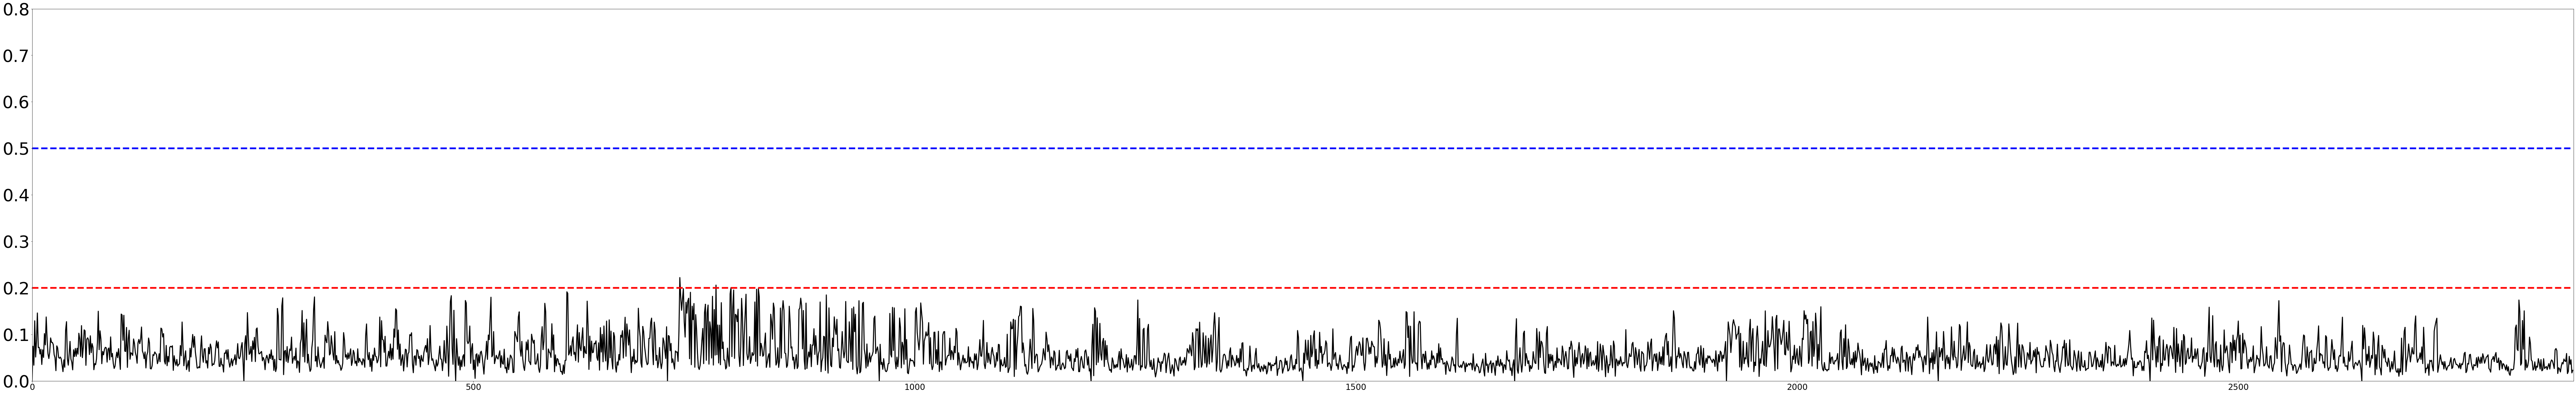

In [ ]:
# plot only fd
fig, ax = plt.subplots(1, 1, figsize=(133,20)) #height: 40->20# /12 #8session:160, 4session:80, majom 18session:360, 12session:240
# fig, ax = plt.subplots(2, 1, figsize=(len(data_fd_scrubbed_all)/6, 40)) 
x = np.arange(len(data_fd_all))
y_2 = 0*x+0.2
y_5 = 0*x+0.5


ax.plot(data_fd_all,color='black',linewidth=3)
# ax[1].plot(data_fd_scrubbed_all,color='black',linewidth=3)

ax.plot(x, y_2,'r--',linewidth=5)
ax.plot(x, y_5,'b--',linewidth=5)
ax.set_ylim(0,0.8)
ax.set_xlim(0,len(data_fd_all))
# ax[1].set_xlim(0,len(data_fd_scrubbed_all))

ax.xaxis.set_tick_params(labelsize=24)
ax.yaxis.set_tick_params(labelsize=50)

### dtseries

In [ ]:
# concate awake sessions and check motion and define motion threshold
# 32k

# z-score
import scipy.io

fdthresh=0.45
motion_scrub = False
# data paths
# ['000','075','100','150','200'] 
isolevel = '000' ##Change this to get the different levels of isoflourine
  
# majom
# pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/info/Anes%s_reduced_10K_3mm_pt_wVol_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 
# pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/info/Anes%s_reduced_n18_10K_3mm_pt_wVol_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 

# brooklyn
# pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/info/Anes%s_reduced_10K_3mm_pt_wVol_noGSR_paths.txt' % (isolevel),dtype='str', delimiter= '\n') 
pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/info/Anes%s_reduced_10K_3mm_pt_wVol_noGSR_paths_n8.txt' % (isolevel),dtype='str', delimiter= '\n')  # for '000' second half

data_cat = []
data_fd_cat = []
data_scrubbed_cat = []
data_fd_scrubbed_cat = []
data_cat_non_norm = []
data_scrubbed_cat_non_norm = []
for ses_i in range(1): # range(len(pt_paths)):
    ses_i = 0
    # use majom data info
    # ptfile = pt_paths[ses_i]
    # ptfile_new = ptfile.replace('dtseries','MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries') # aim to do not touch original path file

    # use brooklyn data info
    ptfile = pt_paths[ses_i]
    ptfile_replace = ptfile.replace('/Users/bene.ramirez/projects/anes/BROOKLYN/ciftis/10k_noGSR_smoothed3mm/','/') # aim to do not touch original path file
    
    # fd path
    # fd_path = ptfile.replace('_DCANBOLDProc_v4.0.0_Atlas.10k.dtseries.nii','')
    # FDfile = "/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/FD_files%s/DCANBOLDProc_v4.0.0/FD.mat" % fd_path
    fd_path = ptfile_replace.replace('_DCANBOLDProc_v4.0.0_Atlas.10k.dtseries.nii','')
    FDfile = "/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/FD_files%s/DCANBOLDProc_v4.0.0/FD.mat" % fd_path

    # read FD
    data_motion = scipy.io.loadmat(FDfile)
    data_fd = np.append(0,data_motion['FD']) # add 0, first tr 
    
    data_fd_cat.append(data_fd)

    # 32k data path
    ptfile_new = ptfile_replace.replace('.10k','')

    # read img data
    # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/10k_noGSR_smoothed3mm_Markov%s" % ptfile_new)
    # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/majom/10k_Markov182_gsr%s" % ptfile_new)
    # img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/10k_noGSR_smoothed3mm_Markov%s" % ptfile_new)
    img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/32k/brooklyn/32k_GSR_awake%s" % ptfile_new)

    data_ses = np.array(img.get_fdata())
    # concate
    axis= 0
    data_ses_zscore = zscore(data_ses,axis=axis) #z-score: across tr parcel mean 0	
    data_cat.append(data_ses_zscore)
    data_cat_non_norm.append(data_ses)


    if motion_scrub == True:
      # motion scrub
      fdmask = data_fd<=fdthresh
      # remove one point before & after
      # TODO: should have easy function to do it.
      fdmask_index = np.where(fdmask==False)
      for i in range(len(fdmask_index)):
        # remove one point before 
        if i == 0:
          fdmask_index_updated = np.insert(fdmask_index,i-1,fdmask_index[i]-1)
        else:
          fdmask_index_updated = np.insert(fdmask_index_updated,i-1,fdmask_index[i]-1)
        # remove one point after 
        fdmask_index_updated = np.insert(fdmask_index_updated,i+1,fdmask_index[i]+1)

      fdmask_index_new = np.positive(np.unique(fdmask_index_updated))

      for i, index_i in enumerate(fdmask_index_new):
        if index_i == 240:
          continue
        else:
          fdmask[index_i] = False
      ### this fdmask is updated - one point before & after

      funcscrubbed = data_ses[fdmask,:]
      data_ses_scrubbed = zscore(funcscrubbed,axis=axis) #z-score: across tr parcel mean 0	
      data_scrubbed_cat.append(data_ses_scrubbed)
      data_scrubbed_cat_non_norm.append(funcscrubbed)

      fd_scrubbed = data_fd[fdmask]
      data_fd_scrubbed_cat.append(fd_scrubbed)
      print(str(len(fd_scrubbed))+'/240')

# pre scrub
data = np.vstack(data_cat) 
data_fd_all = np.concatenate(data_fd_cat)
data_non_norm = np.vstack(data_cat_non_norm) 

if motion_scrub == True:
  # post scrub
  data_scrubbed = np.vstack(data_scrubbed_cat) 
  data_fd_scrubbed_all = np.concatenate(data_fd_scrubbed_cat)
  data_scrubbed_non_norm = np.vstack(data_scrubbed_cat_non_norm) 

# print(len(data_fd_scrubbed_all))

In [ ]:
isolevel = '000'
pt_paths = np.loadtxt('/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/info/Anes%s_reduced_10K_3mm_pt_wVol_noGSR_paths_n8.txt' % (isolevel),dtype='str', delimiter= '\n')  # for '000' second half
ses_i = 0
ptfile = pt_paths[ses_i]
ptfile_replace = ptfile.replace('/Users/bene.ramirez/projects/anes/BROOKLYN/ciftis/10k_noGSR_smoothed3mm/','/') # aim to do not touch original path file
ptfile_new = ptfile_replace.replace('dtseries','MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries') # aim to do not touch original path file


In [ ]:
ptfile_new

'/ses-combined_task-RESTacq20190108_run-1_DCANBOLDProc_v4.0.0_Atlas.10k.MarkovCC12_M132_182-area.10k_fs_LR.dlabel.ptseries.nii'

In [ ]:
ptfile_replace

'/ses-combined_task-RESTacq20190108_run-1_DCANBOLDProc_v4.0.0_Atlas.10k.dtseries.nii'

In [ ]:
img = nib.load("/gdrive/My Drive/CMI/Project/MGCX/NHP/data/10k_Markov182/brooklyn/10k_GSR_smoothed3mm%s" % ptfile_replace)

In [ ]:
np.array(img.get_fdata()).shape

(240, 27087)

In [ ]:
data = np.array(img.get_fdata())

In [ ]:
data.shape

(240, 65815)

In [ ]:
np.min(data_non_norm)

-1352.199951171875

In [ ]:
np.min(data_non_norm_detrend)

-1387.0249254932753

In [ ]:
# https://github.com/DCAN-Labs/dcan_bold_processing/blob/f273eeb334dd6d3ec2d7588a0521d30c0737f47a/matlab_code/dcan_signal_processing.m#L108-L116
# https://github.com/DCAN-Labs/dcan_bold_processing/blob/f273eeb334dd6d3ec2d7588a0521d30c0737f47a/matlab_code/scripts/fig_fMRI_QA.m#L172-L192
# gray plot Xd
# detrend

# matlab code
# th = [0; FD]<=fd_th;
# th(1:skip_frames) = 0;
# th = th==1;

# mX = mean(X(:,th),2);
# Xd = X - mX;
# bXd = zeros(c,2);
# for i=1:c
#     bXd(i,:) = polyfit(local_x,Xd(i,th),1);
#     Xd(i,:) = Xd(i,:) - polyval(bXd(i,:),x);
# end
# Xd = Xd';

# python 
import scipy.signal
data_non_norm_detrend = scipy.signal.detrend(data_non_norm, axis=1)

In [ ]:
X = np.transpose(data_non_norm)
r = np.transpose(X).shape[0]
c = np.transpose(X).shape[1]
th = data_fd<=0.5
skip_frames = 0
th[0:skip_frames] = 0
th = th ==1 
mX = np.mean(X[:,th],axis=1).reshape(c,1)
Xd = X - mX

bXd = np.zeros([c, 2])
x = np.arange(r)

local_x = x[th]

for i in range(c):
  bXd[i,:] = np.polyfit(local_x, Xd[i,th],deg = 1)
  Xd[i,:] = Xd[i,:] - np.polyval(bXd[i,:],x)

Xd = np.transpose(Xd)

In [ ]:
X[:,th].shape

(65815, 210)

In [ ]:
np.max(Xd)

1344.00742216045

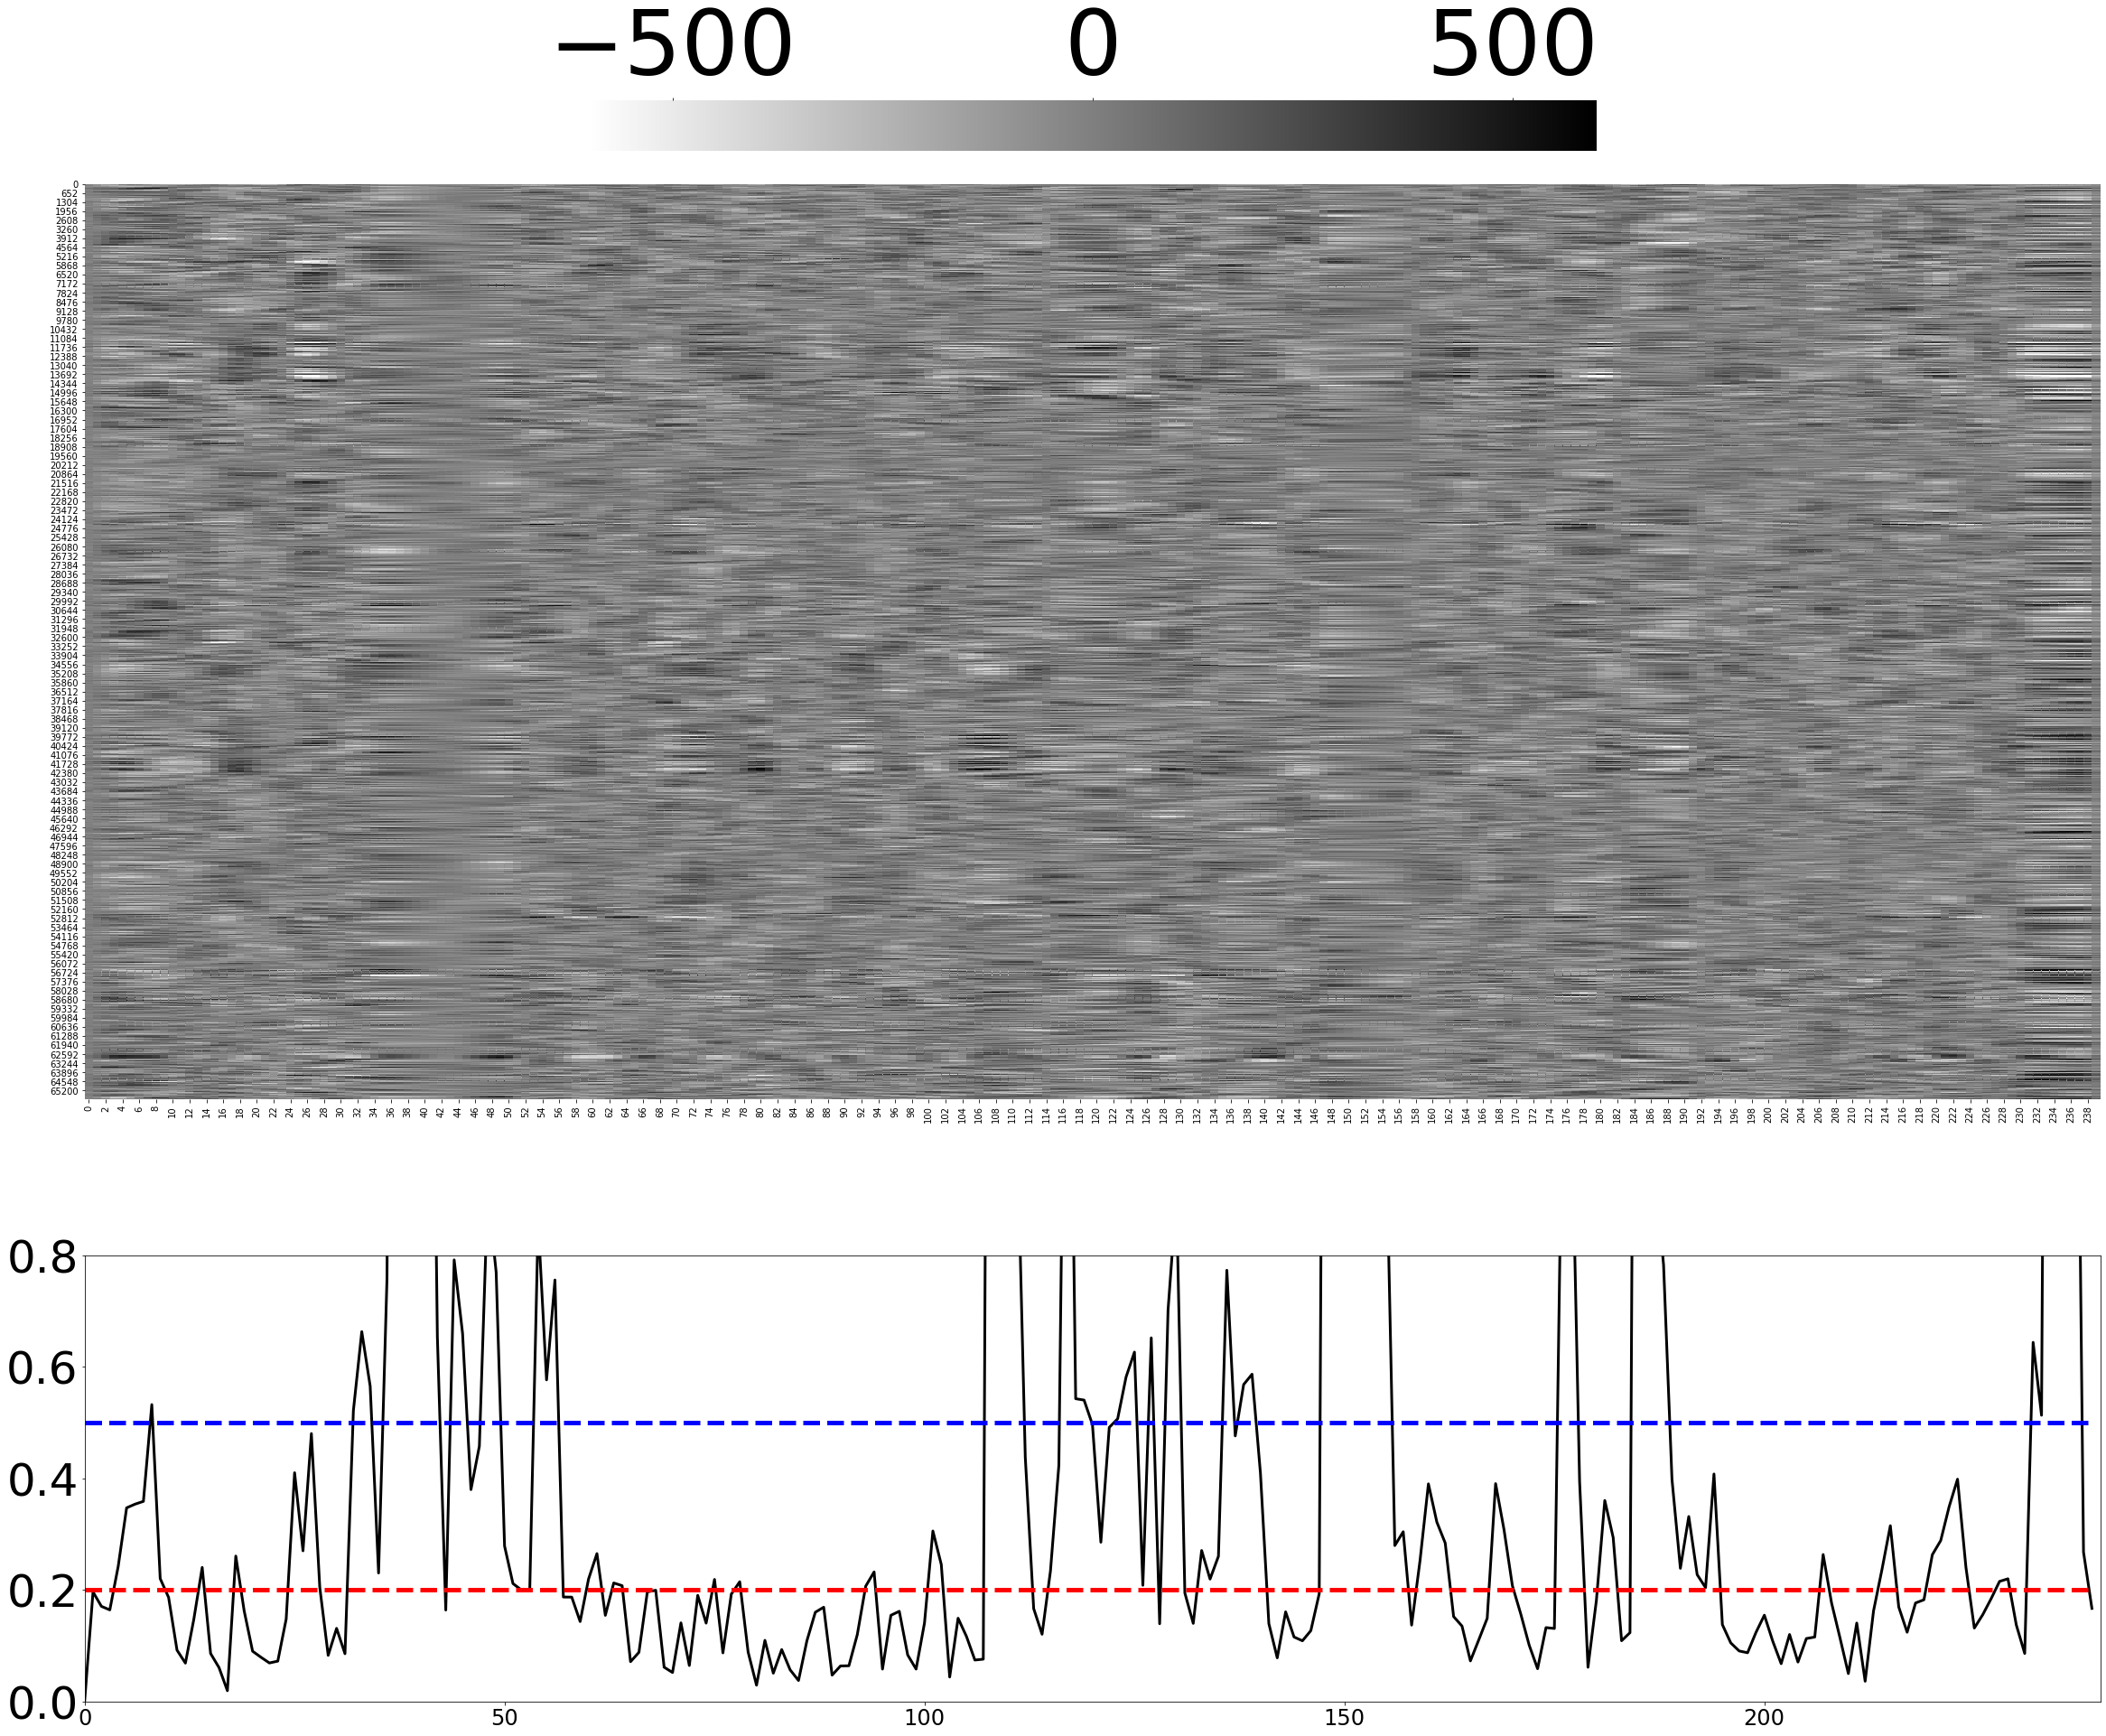

In [ ]:

# plot FD 
# plot gray plot

fig, ax = plt.subplots(2, 1, figsize=(len(data_fd_all)/6, 35),gridspec_kw={'height_ratios': [2.5, 1]}) # /12 #8session:160, 4session:80, majom 18session:360, 12session:240
# fig, ax = plt.subplots(2, 1, figsize=(len(data_fd_scrubbed_all)/6, 35),gridspec_kw={'height_ratios': [2.5, 1]}) 
x = np.arange(len(data_fd_all))
y_2 = 0*x+0.2
y_5 = 0*x+0.5


ax[1].plot(data_fd_all,color='black',linewidth=3)
# ax[1].plot(data_fd_scrubbed_all,color='black',linewidth=3)

ax[1].plot(x, y_2,'r--',linewidth=5)
ax[1].plot(x, y_5,'b--',linewidth=5)
ax[1].set_ylim(0,0.8)
ax[1].set_xlim(0,len(data_fd_all))
# ax[1].set_xlim(0,len(data_fd_scrubbed_all))

ax[1].xaxis.set_tick_params(labelsize=24)
ax[1].yaxis.set_tick_params(labelsize=50)

# sns.heatmap(np.transpose(data),cmap='binary',ax=ax[0], vmax=100, vmin=-100,cbar=True, cbar_kws = dict(use_gridspec=False,location="top",aspect= 20,pad=0.03,shrink=0.5)) #dtseries vmax=1, vmin=-1, 
sns.heatmap(np.transpose(Xd),cmap='binary',ax=ax[0],vmax=600, vmin=-600,cbar=True, cbar_kws = dict(use_gridspec=False,location="top",aspect= 20,pad=0.03,shrink=0.5)) #vmax=1, vmin=-1,
# sns.heatmap(np.transpose(data_scrubbed_non_norm),cmap='binary',ax=ax[0],vmax=100, vmin=-100,cbar=True, cbar_kws = dict(use_gridspec=False,location="top",aspect= 20,pad=0.03,shrink=0.5)) #vmax=1, vmin=-1,

cbar = ax[0].collections[0].colorbar
# here set the labelsize by 50
cbar.ax.tick_params(labelsize=100)
# plt.tight_layout() 